- Training data only a few months at a time for better accuracy since extremely old years worth of data have more volatility and doesn't indicate trends for predicting current to future trends
-Since model is simple, sometimes will show promising results. Other times definitely not.

In [ ]:
import requests #requests library for HTTP requests

In [ ]:
def get_stock_data(stock_symbol, start_date, end_date):
    base_url = f'https://api.tiingo.com/tiingo/daily/{stock_symbol}/prices?'
    token = '92549df1ba9e9e2d4d3c7c916a312b5f665a92a4'
    payload = {
        'startDate': start_date,
        'endDate': end_date,
        'token': token
    }
    response = requests.get(base_url, params=payload)
    return response

In [ ]:
response = get_stock_data('MSFT', '2022-1-1', '2022-8-1')
print(response.url)
print(response.json())

https://api.tiingo.com/tiingo/daily/MSFT/prices?startDate=2022-1-1&endDate=2022-8-1&token=92549df1ba9e9e2d4d3c7c916a312b5f665a92a4
[{'date': '2022-01-03T00:00:00.000Z', 'close': 334.75, 'high': 338.0, 'low': 329.78, 'open': 335.35, 'volume': 28918013, 'adjClose': 331.6047390147, 'adjHigh': 334.8242025003, 'adjLow': 326.6814363922, 'adjOpen': 332.1991015044, 'adjVolume': 28918013, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2022-01-04T00:00:00.000Z', 'close': 329.01, 'high': 335.2, 'low': 326.12, 'open': 334.83, 'volume': 32674306, 'adjClose': 325.9186711971, 'adjHigh': 332.050510882, 'adjLow': 323.0558252053, 'adjOpen': 331.6839873467, 'adjVolume': 32674306, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2022-01-05T00:00:00.000Z', 'close': 316.38, 'high': 326.07, 'low': 315.98, 'open': 325.86, 'volume': 40054327, 'adjClose': 313.4073407901, 'adjHigh': 323.0062949979, 'adjLow': 313.0110991303, 'adjOpen': 322.7982681265, 'adjVolume': 40054327, 'divCash': 0.0, 'splitFactor': 1.0}, {'da

In [ ]:
def parse_data(data_response):
    json_data = data_response.json()
    dates = []
    closes =[]
    opens = []
    highs = []
    lows = []
    vols = []
    for json_object in json_data:
        dates.append(json_object['date'])
        closes.append(json_object['close'])
        opens.append(json_object['open'])
        highs.append(json_object['high'])
        lows.append(json_object['low'])
        vols.append(json_object['volume'])
    return dates, closes, opens, highs, lows, vols

In [ ]:
dates, closes, opens, highs, lows, vols = parse_data(response)
print(dates)
print('')

clean_dates = []
for elem in dates:
    clean_dates.append(elem[5:10])

print(clean_dates)
    

['2022-01-03T00:00:00.000Z', '2022-01-04T00:00:00.000Z', '2022-01-05T00:00:00.000Z', '2022-01-06T00:00:00.000Z', '2022-01-07T00:00:00.000Z', '2022-01-10T00:00:00.000Z', '2022-01-11T00:00:00.000Z', '2022-01-12T00:00:00.000Z', '2022-01-13T00:00:00.000Z', '2022-01-14T00:00:00.000Z', '2022-01-18T00:00:00.000Z', '2022-01-19T00:00:00.000Z', '2022-01-20T00:00:00.000Z', '2022-01-21T00:00:00.000Z', '2022-01-24T00:00:00.000Z', '2022-01-25T00:00:00.000Z', '2022-01-26T00:00:00.000Z', '2022-01-27T00:00:00.000Z', '2022-01-28T00:00:00.000Z', '2022-01-31T00:00:00.000Z', '2022-02-01T00:00:00.000Z', '2022-02-02T00:00:00.000Z', '2022-02-03T00:00:00.000Z', '2022-02-04T00:00:00.000Z', '2022-02-07T00:00:00.000Z', '2022-02-08T00:00:00.000Z', '2022-02-09T00:00:00.000Z', '2022-02-10T00:00:00.000Z', '2022-02-11T00:00:00.000Z', '2022-02-14T00:00:00.000Z', '2022-02-15T00:00:00.000Z', '2022-02-16T00:00:00.000Z', '2022-02-17T00:00:00.000Z', '2022-02-18T00:00:00.000Z', '2022-02-22T00:00:00.000Z', '2022-02-23T00:00:0

In [ ]:
def calculate_price_difference(opens, closes):
    price_differences = []
    #No need for open price of first data point or close price of last data point since no close or open from prev or next days respectively to compare
    for i in range(len(opens) - 1): 
        if opens[i + 1] >= closes[i]: #skip first open point and last close point
            price_differences.append([1, 0]) #One Hot Encoder, [1 0] increase, [0 1] decrease for classification 
        else:
            price_differences.append([0, 1])
    return price_differences

In [ ]:
price_differences = calculate_price_difference(opens, closes)
differences = []
for difference in price_differences: #for each array in price differences array, append the first value to show increase or decrease
    differences.append(difference[0]) 

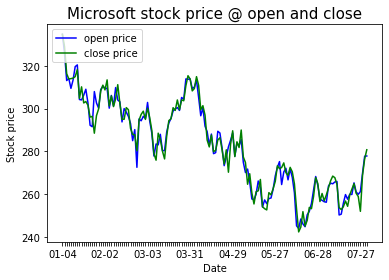

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()

plt.plot(clean_dates[1:], opens[1:], "-b", label="open price") 
plt.plot(clean_dates[1:], closes[:-1], "-g", label="close price")
plt.legend(loc="upper left")

every_nth = 20
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

plt.title('Microsoft stock price @ open and close', fontsize=15)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Stock price', fontsize=10)

plt.show() #Show opens and closes as separate lines to aid visualisation

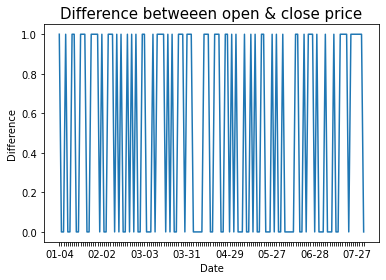

In [ ]:
fig, ax = plt.subplots()
plt.plot(clean_dates[1:], differences) #Show differences between nominal 0 and 1
every_nth = 20
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

plt.title('Difference betweeen open & close price', fontsize=15)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Difference', fontsize=10)

plt.show()

In [ ]:
def create_datasets(stock_symbol, start_date, end_date):
    response = get_stock_data(stock_symbol, start_date, end_date)
    dates, closes, opens, highs, lows, vols = parse_data(response)
    
    labels = calculate_price_difference(opens, closes)
    
    inputs = []
    for i in range(len(labels)):
        inputs.append([closes[i], opens[i], highs[i], lows[i], vols[i]/1000]) 
        #vols/1000 for vols to not skew the data as much since vols in millions whereas other values in hundreds or thousands
    
    return inputs, labels

In [ ]:
x_train, y_train = create_datasets('MSFT', '2021-1-1', '2022-7-1') #Training dataset, About a year - 2 years worth of data shows better results for linear regression, trial and error to find out
x_test, y_test = create_datasets('MSFT', '2021-10-1', '2022-3-2') #Testing dataset
#Again too much data is not always good, refer back to top of notebook
print('inputs train set:',x_train)
print('labels train set:',y_train)
print('inputs test set:', x_test)
print('labels test set:', y_test)

inputs train set: [[217.69, 222.53, 223.0, 214.81, 37130.139], [217.9, 217.26, 218.52, 215.7, 23822.953], [212.25, 212.17, 216.4899, 211.94, 35930.653], [218.29, 214.04, 219.34, 213.71, 27694.48], [219.62, 218.68, 220.58, 217.0261, 22956.206], [217.49, 218.47, 218.91, 216.73, 23047.029], [214.93, 216.5, 217.1, 213.3202, 23148.341], [216.34, 214.02, 216.76, 213.9266, 20087.08], [213.02, 215.91, 217.46, 212.74, 29346.737], [212.65, 213.52, 214.51, 212.03, 31746.512], [216.44, 213.75, 216.98, 212.63, 30480.859], [224.34, 217.7, 225.79, 217.2908, 37777.26], [224.97, 224.7, 226.3, 222.42, 30749.553], [225.95, 227.08, 230.07, 225.8, 30172.663], [229.53, 229.12, 229.78, 224.22, 33152.095], [232.33, 231.86, 234.18, 230.08, 49169.601], [232.9, 238.0, 240.44, 230.14, 69870.638], [238.93, 235.61, 242.64, 235.09, 49111.159], [231.96, 235.99, 238.02, 231.35, 42503.138], [239.65, 235.06, 242.5, 232.43, 33314.193], [239.51, 241.3, 242.31, 238.69, 25678.356], [243.0, 239.57, 245.09, 239.26, 27158.104]

In [ ]:
# y = Wx + b
import tensorflow.compat.v1 as tf #TF is Open-Sourced Library that provide mathematical tool and analysis of data
tf.disable_v2_behavior()

#TF contains various node types to help build computational graphs

In [ ]:
x_input = tf.placeholder(dtype=tf.float32, shape=[None, 5]) #None: any number, 5: each input has 5 elements in it
y_input = tf.placeholder(dtype=tf.float32, shape=[None, 2])#None: any number, 5: each input has 2 elements in it
#using ones to create arrays of ones instead of zeroes since sometimes zeroes can cause dead neurons 
W = tf.Variable(initial_value=tf.ones(shape=[5, 2])) #Shape for W should be the combination of x_input and y_input, as it's the ratio between them
b = tf.Variable(initial_value=tf.ones(shape=[2])) # output is array of two members (from OHE i.e. [1,0] or [0,1]) shape has to reflect that
y_output = tf.add(tf.matmul(x_input, W), b) #Matrix multiplication due to W matrix multiplied with x_input

In [ ]:
#loss function, add together all components of loss func, reduce_mean find minimum avg. of answers
# softmax_cross_entropy_with_logits_v2 is another loss func, logits is similar to OHE
loss = tf.reduce_sum(tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(
        labels=y_input, logits=y_output))) #labels: y-train, y_test; logits: model outputs
optimizer = tf.train.GradientDescentOptimizer(0.001) #0.001 learning rate
#Different optimizers don't give too much variance in results but can still improve model slightly, trial and error 
train_step = optimizer.minimize(loss)

In [ ]:
def measure_accuracy(actual, expected):
    num_correct = 0
    for i in range(len(actual)):
        actual_value = actual[i]
        expected_value = expected[i]
        #[1,0] or [0.55,0.45] etc. since not exactly [1,0] during calculation, actual and expected
        if actual_value[0] >= actual_value[1] and expected_value[0] >= expected_value[1]:  
            num_correct += 1
        #[0,1] or [0.3,0.7] etc. since not exactly [0,1] during calculation, actual and expected
        elif actual_value[0] <= actual_value[1] and expected_value[0] <= expected_value[1]:
            num_correct += 1
    return (num_correct / len(actual)) * 100 #return percentage average of actual accuracy

In [ ]:
session = tf.Session()
session.run(tf.global_variables_initializer())

In [ ]:
for _ in range(20000): #Optimal result between 10000 - 20000 epochs, trial and error
    session.run(train_step, feed_dict={x_input: x_train, y_input: y_train})
print('Model accuracy: ', measure_accuracy(session.run(
    y_output, feed_dict={x_input: x_test}), y_test), '%') #accuracy on testing set to make sure that it is accurate to real input, training accuracy is probably low
#Run input through graph itself, feed dict for x_input

#Improvements: increase no. of epochs, lower learning rate(need to increase. epochs as well)
#This is simple Linear Regression so not much acc. also COVID have caused high volatility within the market in the last 2 years

Model accuracy:  55.769230769230774 %


In [ ]:
print('expected labelling after training: ', session.run(y_output, feed_dict={x_input: x_test}))
print('actual labelling:', y_test)

expected labelling after training:  [[ 331027.38  -268554.03 ]
 [ 346247.6   -281252.78 ]
 [ 270075.    -217780.73 ]
 [ 305748.34  -247412.2  ]
 [ 214752.89  -171518.9  ]
 [ 181935.36  -144190.28 ]
 [ 201297.5   -160333.1  ]
 [ 185519.12  -147207.98 ]
 [ 250473.31  -201248.19 ]
 [ 295803.9   -238857.27 ]
 [ 273160.66  -219954.08 ]
 [ 241177.27  -193262.27 ]
 [ 180612.64  -142771.36 ]
 [ 166944.16  -131394.84 ]
 [ 171413.22  -135095.9  ]
 [ 177694.2   -140307.94 ]
 [ 179074.88  -141488.48 ]
 [ 304938.1   -246224.11 ]
 [ 596428.5   -488663.3  ]
 [ 282000.1   -226800.   ]
 [ 382736.03  -310562.84 ]
 [ 287889.53  -231556.9  ]
 [ 274292.9   -220186.83 ]
 [ 223718.61  -178039.05 ]
 [ 253426.95  -202758.25 ]
 [ 236153.69  -188304.98 ]
 [ 216196.69  -171697.67 ]
 [ 204173.97  -161689.5  ]
 [ 271616.16  -217940.33 ]
 [ 168308.23  -131942.05 ]
 [ 247229.61  -197564.1  ]
 [ 166351.48  -130203.88 ]
 [ 215948.75  -171460.06 ]
 [ 193886.11  -153051.33 ]
 [ 234593.84  -186935.81 ]
 [ 228287.11  -1816